In [ ]:
#####  Full temperature data analysis ##### 

# Contents:
# 1. Data download 
# 2. Data pre-processing (converting binary temperature data to a .csv format and selecting specific data locations (lat = ..., lon = ...))
# 3. Loading the .csv files as new variables
# 4. Setting a "date_time" format as an index for easier analysis 
# 5. Resampling Tmax and Tmin data for mean weekly, monthly, yearly data and Kharif and Rabi seasons
# 6. Plotting the general temperature trend for Tmax and Tmin
# 7. Plotting the tmax and tmin spread (DTV)
# 8.1 Probability distribution of tmax and tmin values (single plot)
# 8.2.Probability distribution of tmax and tmin values (multiple plots)
# 9. Checking if there are statistically significant differences in the temperature changes for tmax and tmin over the years.
# 10. Monthly temperature change (single plot)
# 10.2 Monthly temperature change (could be adjusted to e.g. weekly) (multiple plots)
# 11.1 Decadal (or different) moving warming rate. Function definition
# 11.2 Plotting decadal warming rate
# 11.3 Plotting decadal warming rate (multiple plots)
# 11.4  Correlation in warming/cooling decadal trends between regions
# 12.1 Temperature anomalies. Preparing a new df. Calculating climatology
# 12.2 Temperature anomalies. Plotting anomalies
# 13.1 Setting a threshold of a hot/cold day. Function definition
# 13.2 Setting a threshold of a hot day.  
# 13.3 Setting a threshold of a hot day. Calculating the thresholds
# 14. Function definition. Counting hot days
# 15. Function to count cold days
# 16. Function to plot the number of hot days
# 17. Function to plot the number of cold days
# 18. Counting the hot and cold days in both locations
# 19. Plotting the number of hot days
# 20. Plotting cold days
# 21. Variation in the number of hot/cold days
# 21. The rate of change of the number of hot days differs in the two regions?
# 22. First hot day in the year. Function definition
# 23. First cold day in the year. Function definition
# 24. Last hot day in the year. Function definition
# 25. Calculating the first/last hot/cold day in a year 
# 26. Function for plotting the first hot day
# 27. Function for plotting the last hot day
# 28. Function for plotting the first cold day
# 29. Plotting the first and last hot day
# 30. Consevutive hot days. Flagging hot days in a df
# 31. Consevutive hot days. Function definition
# 32. Consevutive cold days. Function definition
# 33. Analysing the hot/cold streaks 
# 34. Plotting hot streaks. Function definition 
# 35. Plotting cold streaks. Function definition
# 36. Plotting hot streaks.
# 37. Plotting cold streaks

In [1]:
# Loading libraries
# Reminder, to run this script, first run "Install_requirements.ipynb". For more information, see the  file "Readme.md"
import imdlib as imd
import os
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind

In [ ]:
##### 1. Data download  #####

##### THIS NEEDS TO BE DONE ONLY ONCE TO DOWNLOAD THE DATA #####
# Downloading binary data from IMD
# By doing this, a new folder with downloaded binary data will be created in the folder of this notebook

# Tmax
start_yr = 1951 # Temperature data available from 1951
end_yr = 2024
variable = 'tmax'
file_dir = 'dataimd'
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)

# Tmin
start_yr = 1951 # Temperature data available from 1951
end_yr = 2024
variable = 'tmin'
file_dir = 'dataimd'
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)

##### THIS NEEDS TO BE DONE ONLY ONCE TO DOWNLOAD THE DATA ##### 

In [ ]:
##### 2. Data pre-processing  #####

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####
# Reading binary datasets downloaded from IMD

# General
start_yr = 1951
end_yr = 2024
file_format = 'yearwise' # other option (None), which will assume default IMD naming convention

# Tmax
variable = 'tmax'
file_dir = 'dataimd/tmax' # Path to the location of the binary dataset
data_tmax = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)

#Tmin
variable = 'tmin'
file_dir = 'dataimd/tmin' # Path to the location of the binary dataset
data_tmin = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####

In [ ]:
##### 2. Data pre-processing. Converting binary temperature data to a .csv format and selecting specific data locations  #####

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####
# Converting the downloaded data to a .csv format

# This analysis was done for Raichur (lat = 13.25, lon = 77.44) and Chikkaballapur (lat = 16.08, lon = 76.75). 
# In this case, each location had only one temperature data coordinate
# It is possible to select multiple points for each location (latLong = [[lat1,lon1], [lat2,lon2], ... ])


# Chikkaballapur
lat = 13.25 
lon = 77.44 
out_dir= "dataimd"
data_tmax.to_csv('tmax.csv', lat, lon, out_dir)
data_tmin.to_csv('tmin.csv', lat, lon, out_dir)

# Raichur
lat = 16.08
lon = 76.75
out_dir= "dataimd"
data_tmax.to_csv('tmax.csv', lat, lon, out_dir)
data_tmin.to_csv('tmin.csv', lat, lon, out_dir)

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####

In [3]:
##### 3. Loading the .csv files as new variables #####
tmax_chik = pd.read_csv("dataimd/tmax_13.25_77.44.csv", delimiter=",")
tmin_chik = pd.read_csv("dataimd/tmin_13.25_77.44.csv", delimiter=",")
tmax_raich = pd.read_csv("dataimd/tmax_16.08_76.75.csv", delimiter=",")
tmin_raich = pd.read_csv("dataimd/tmin_16.08_76.75.csv", delimiter=",")

In [5]:
##### 4. Setting a "date_time" format as an index for easier analysis #####

###########################################
tmax_chik["date_time"] = pd.to_datetime(tmax_chik["DateTime"])
# Set date_time as the index
tmax_chik.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmax_chik.rename(columns={'13.25 77.44': 'Temperature'}, inplace=True)

###########################################
tmin_raich["date_time"] = pd.to_datetime(tmin_raich["DateTime"])
# Set date_time as the index
tmin_raich.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmin_raich.rename(columns={'16.08 76.75': 'Temperature'}, inplace=True)

###########################################
tmin_chik["date_time"] = pd.to_datetime(tmin_chik["DateTime"])
# Set date_time as the index
tmin_chik.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmin_chik.rename(columns={'13.25 77.44': 'Temperature'}, inplace=True)

###########################################
tmax_raich["date_time"] = pd.to_datetime(tmax_raich["DateTime"])
# Set date_time as the index
tmax_raich.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmax_raich.rename(columns={'16.08 76.75': 'Temperature'}, inplace=True)

# Deleting the additional DateTime column 
del tmax_chik['DateTime']
del tmax_raich['DateTime']
del tmin_chik['DateTime']
del tmin_raich['DateTime']


In [9]:
##### 5. Resampling Tmax and Tmin data for mean weekly, monthly and yearly data ##### 

###########################################
tmax_raich_monthly_mean = tmax_raich.resample("ME").mean()
tmax_raich_weekly_mean = tmax_raich.resample("W").mean()
tmax_raich_yearly_mean = tmax_raich.resample("YE").mean()

tmax_chik_monthly_mean = tmax_chik.resample("ME").mean()
tmax_chik_weekly_mean = tmax_chik.resample("W").mean()
tmax_chik_yearly_mean = tmax_chik.resample("YE").mean()

###########################################

# Resampling Tmax data for maximum weekly, monthly and yearly data

###########################################
tmax_raich_monthly_max = tmax_raich.resample("ME").max()
tmax_raich_weekly_max = tmax_raich.resample("W").max()
tmax_raich_yearly_max = tmax_raich.resample("YE").max()

tmax_chik_monthly_max  = tmax_chik.resample("ME").max()
tmax_chik_weekly_max = tmax_chik.resample("W").max()
tmax_chik_yearly_max = tmax_chik.resample("YE").max()

###########################################

# Resampling Tmax data for minimum weekly, monthly and yearly data

###########################################
tmax_raich_monthly_min = tmax_raich.resample("ME").min()
tmax_raich_weekly_min = tmax_raich.resample("W").min()
tmax_raich_yearly_min = tmax_raich.resample("YE").min()

tmax_chik_monthly_min  = tmax_chik.resample("ME").min()
tmax_chik_weekly_min = tmax_chik.resample("W").min()
tmax_chik_yearly_min = tmax_chik.resample("YE").min()

# Resampling Tmin data for mean weekly, monthly and yearly data

###########################################
tmin_raich_monthly_mean = tmin_raich.resample("ME").mean()
tmin_raich_weekly_mean = tmin_raich.resample("W").mean()
tmin_raich_yearly_mean = tmin_raich.resample("YE").mean()

tmin_chik_monthly_mean = tmin_chik.resample("ME").mean()
tmin_chik_weekly_mean = tmin_chik.resample("W").mean()
tmin_chik_yearly_mean = tmin_chik.resample("YE").mean()

###########################################

# Resampling Tmin data for minimum weekly, monthly and yearly data

###########################################
tmin_raich_monthly_max = tmin_raich.resample("ME").max()
tmin_raich_weekly_max = tmin_raich.resample("W").max()
tmin_raich_yearly_max = tmin_raich.resample("YE").max()

tmin_chik_monthly_max = tmin_chik.resample("ME").max()
tmin_chik_weekly_max = tmin_chik.resample("W").max()
tmin_chik_yearly_max = tmin_chik.resample("YE").max()

###########################################

# Resampling Tmin data for minimum weekly, monthly and yearly data

###########################################
tmin_raich_monthly_min = tmin_raich.resample("ME").min()
tmin_raich_weekly_min = tmin_raich.resample("W").min()
tmin_raich_yearly_min = tmin_raich.resample("YE").min()

tmin_chik_monthly_min = tmin_chik.resample("ME").min()
tmin_chik_weekly_min = tmin_chik.resample("W").min()
tmin_chik_yearly_min = tmin_chik.resample("YE").min()

###########################################
# Extracting the seasonal data

tmax_raich_kharif = tmax_raich[(tmax_raich.index.month >= 6) & (tmax_raich.index.month <= 10)]
tmax_chik_kharif = tmax_chik[(tmax_chik.index.month >= 6) & (tmax_chik.index.month <= 10)]

rabi_months_mask_raich = tmax_raich.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmax_raich_rabi = tmax_raich.loc[rabi_months_mask_raich]

rabi_months_mask_chik = tmax_chik.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmax_chik_rabi = tmax_chik.loc[rabi_months_mask_chik]


tmin_raich_kharif = tmin_raich[(tmin_raich.index.month >= 6) & (tmin_raich.index.month <= 10)]
tmin_chik_kharif = tmin_chik[(tmin_chik.index.month >= 6) & (tmin_chik.index.month <= 10)]


rabi_months_mask_raich = tmax_raich.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmin_raich_rabi = tmin_raich.loc[rabi_months_mask_raich]

rabi_months_mask_chik = tmax_chik.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmin_chik_rabi = tmin_chik.loc[rabi_months_mask_chik]

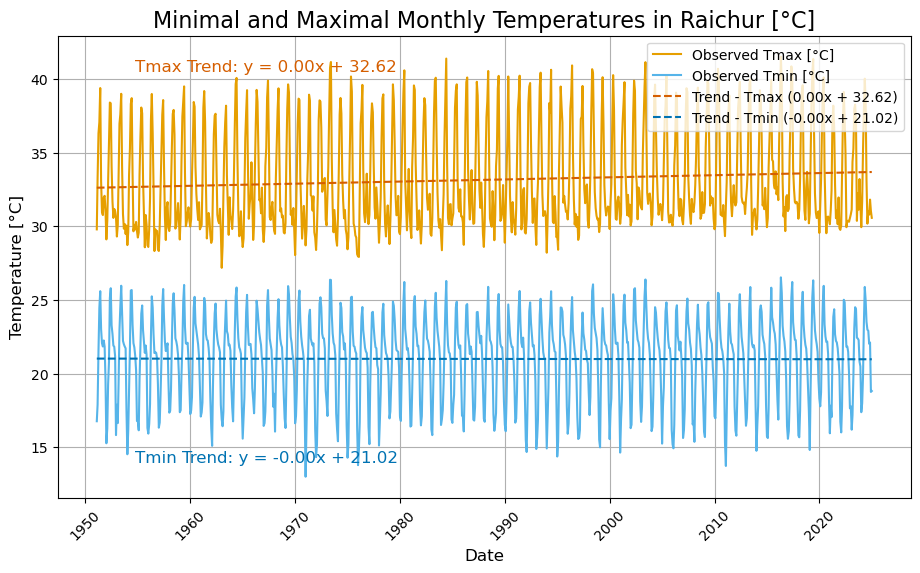

In [11]:
##### 6. Plotting the general temperature trend for Tmax and Tmin ##### 

# Available time options: yearly, monthly, weekly, daily and seasonally (Kharif and Rabi seasons) (for daily and seasonal use: e.g.: tmax_raich, tmin_chik)
# Available values for options: yearly, monthly, weekly:
#                                                      Tmax: mean Tmax, max Tmax, min Tmax
#                                                      Tmin: mean Tmin, max Tmin, min Tmin
    

##### Plotting settings. Choose available time option and value for Tmax and Timn. In this example mean of monthly Tmax and Tmin for Raichur was selected
tmax = tmax_raich_monthly_mean
tmin = tmin_raich_monthly_mean
location = "Raichur" # Raichur or Chikkaballapur for this analysis. This will update the plot title
time_option = "Month" # Year, Month, Week
##### End of plotting settings

# Calculating the trend line
tmax_coeffs = np.polyfit(range(len(tmax)), tmax['Temperature'], 1)
tmin_coeffs = np.polyfit(range(len(tmin)), tmin['Temperature'], 1)

tmax_fit = np.poly1d(tmax_coeffs)
tmin_fit = np.poly1d(tmin_coeffs)

# Plotting the observed temperatures
plt.figure(figsize=(11,6))
plt.plot(tmax.index, tmax['Temperature'], label='Observed Tmax [°C]', color='#E69F00')
plt.plot(tmin.index, tmin['Temperature'], label='Observed Tmin [°C]', color='#56B4E9')

# Plot the trend lines
plt.plot(tmax.index, tmax_fit(range(len(tmax))), linestyle='dashed', color='#D55E00', label=f'Trend - Tmax ({tmax_coeffs[0]:.2f}x + {tmax_coeffs[1]:.2f})')
plt.plot(tmin.index, tmin_fit(range(len(tmin))), linestyle='dashed', color='#0072B2', label=f'Trend - Tmin ({tmin_coeffs[0]:.2f}x + {tmin_coeffs[1]:.2f})')

# Formatting the plot
plt.title(f"Minimal and Maximal {time_option}ly Temperatures in {location} [°C]", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature [°C]', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc = "upper right")
plt.grid(True)

# Show the equation on the plot
plt.text(tmax.index[int(len(tmax) * 0.05)], 
         max(tmax['Temperature']) - 1, 
         f"Tmax Trend: y = {tmax_coeffs[0]:.2f}x + {tmax_coeffs[1]:.2f}", 
         color="#D55E00", fontsize=12)

plt.text(tmin.index[int(len(tmin) * 0.05)], 
         min(tmin['Temperature']) + 1, 
         f"Tmin Trend: y = {tmin_coeffs[0]:.2f}x + {tmin_coeffs[1]:.2f}", 
         color="#0072B2", fontsize=12)

plt.show()


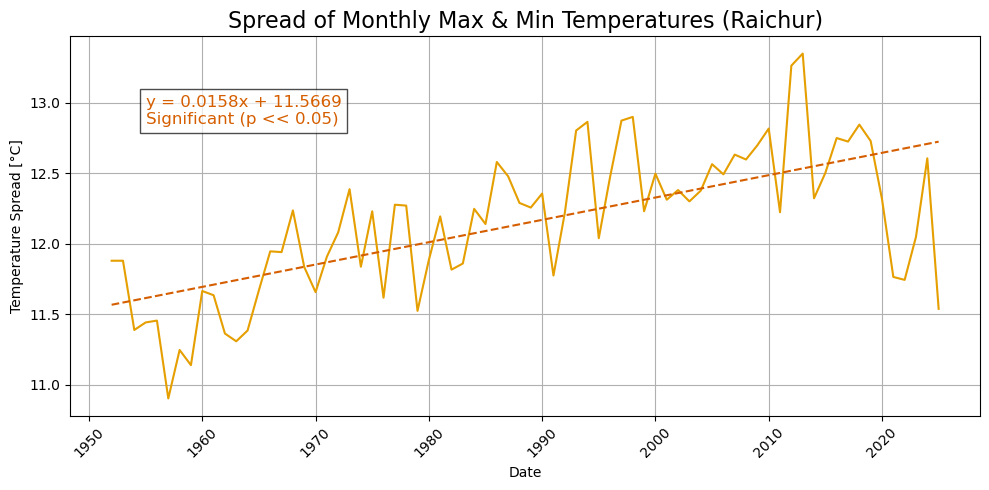

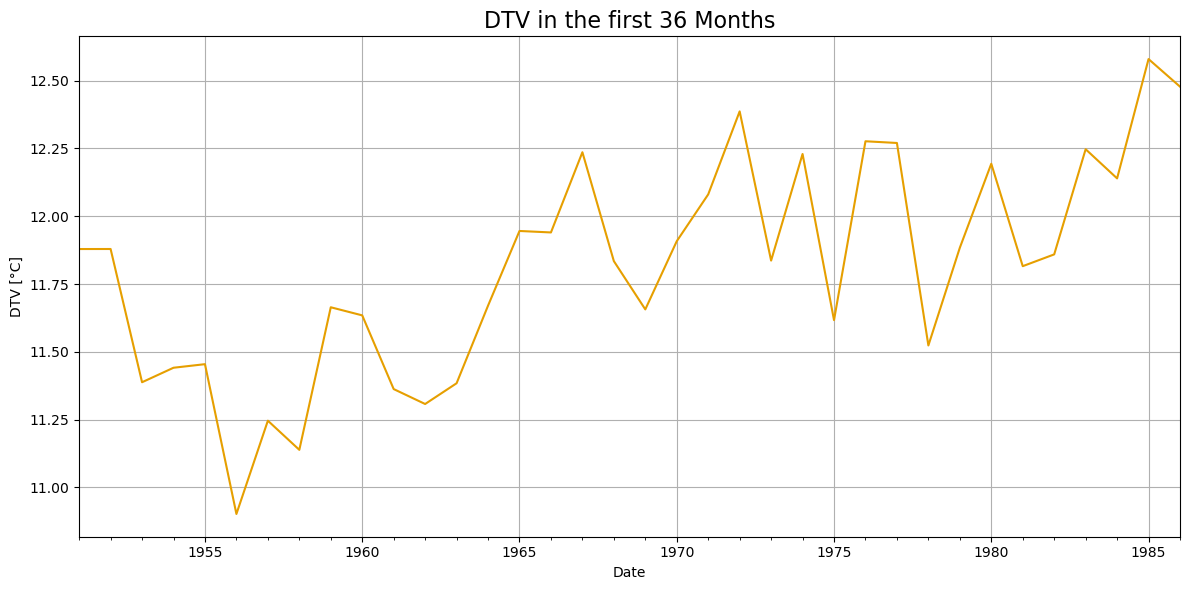

In [19]:
##### 7. Plotting the tmax and tmin spread (DTV) ##### 

# Available time options: yearly, monthly, weekly, daily
# Available values:
#                 Tmax: mean Tmax, max Tmax, min Tmax
#                 Tmin: mean Tmin, max Tmin, min Tmin


##### Plotting settings. Choose the available time option and value for Tmax and Timn. In this example mean of monthly Tmax and Tmin for Raichur was selected
tmax = tmax_raich_yearly_mean
tmin = tmin_raich_yearly_mean
location = "Raichur" # Raichur or Chikkaballapur for this analysis. This will update the plot title
time_option = "Month" # Year, Month, Week
units = 36 # For how many first years/ months/ weeks DTV should be shown in the 2nd plot
##### End of plotting settings

spread = tmax - tmin

x = np.arange(len(spread))
y = spread['Temperature'].values

# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trend_line = intercept + slope * x

# Plot the observed spread
plt.figure(figsize=(10, 5))
plt.plot(spread.index, y, label=f'Observed {time_option} temperature spread\n(tmax - tmin)', color='#E69F00')

# Plot the trend line
plt.plot(spread.index, trend_line, linestyle='dashed', color='#D55E00', 
         label=f'Trend line: y = {slope:.2f}x + {intercept:.2f} (p = {p_value:.3f})')

# Formatting
plt.title(f"Spread of {time_option}ly Max & Min Temperatures ({location})", fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Temperature Spread [°C]')
plt.xticks(rotation=45)
plt.grid(True)

# # Show slope and significance in the plot
# plt.text(spread.index[int(len(spread) * 0.05)], 
#          max(y) - 0.5, 
#          f"Slope = {slope:.4f} °C/{time_option}\n{'Significant' if p_value < 0.05 else 'Not significant'} (p = {p_value:.3f})", 
#          color="#D55E00", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Determine p-value string
if p_value < 0.01:
    p_str = "p << 0.05"
elif p_value < 0.05:
    p_str = "p < 0.05"
else:
    p_str = f"p = {p_value:.3f}"

# Plot trend line equation and significance
plt.text(spread.index[int(len(spread) * 0.05)], 
         max(y) - 0.5, 
         f"y = {slope:.4f}x + {intercept:.4f}\n{'Significant' if p_value < 0.05 else 'Not significant'} ({p_str})", 
         color="#D55E00", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))


plt.tight_layout()
plt.show()

spread.head(units).plot(figsize=(12, 6), legend=False, color='#E69F00')
plt.title(f'DTV in the first {units} {time_option}s', fontsize = 16)
plt.xlabel('Date')
plt.ylabel('DTV [°C]')
plt.grid(True)
plt.tight_layout()
plt.show()

Summary Statistics (1951-1971):
count    7306.000000
mean       32.680037
std         3.711039
min        23.070000
25%        29.890000
50%        31.670000
75%        35.390000
max        42.540000
Name: Temperature, dtype: float64

Summary Statistics (2004-2024):
count    7671.000000
mean       33.478682
std         3.664105
min        24.053100
25%        30.822100
50%        32.470000
75%        36.113400
max        43.730000
Name: Temperature, dtype: float64

T-test results: t-statistic = -13.246, p-value = 0.00000


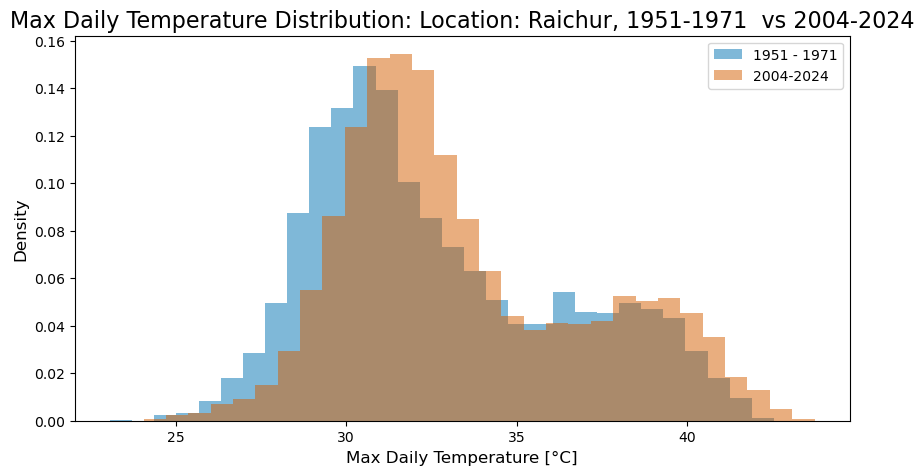

In [20]:
##### 8.1. Probability distribution of tmax and tmin values ##### 
# Single plot

##### Plotting settings
t = tmax_raich # Temperature dataset
t_type = "Max" # Max or Min. Will be used to update the name of the plot
location = "Raichur"
# In this plot, two time periods (e.g. the first two and last decades) of the dataset are compared.
first_start = "1951-01-01" # first_start is the beginning of the first period
first_end = "1971-01-01" # end of the first period
last_start = "2004-01-01" # beginning of the last period
last_end = "2024-12-31" # end of last period
##### End of plotting settings


# Slice the first and last decades
t_first = t.loc[first_start:first_end]
t_last = t.loc[last_start:last_end]

# Extract temperature values
temps_first = t_first["Temperature"]
temps_last = t_last["Temperature"]

# Compute summary statistics
summary_first = temps_first.describe()
summary_last = temps_last.describe()

# Perform an independent t-test (Welch’s t-test for unequal variances)
t_stat, p_value = stats.ttest_ind(temps_first, temps_last, equal_var=False)

# Print summary statistics and test results
print("Summary Statistics (1951-1971):")
print(summary_first)
print("\nSummary Statistics (2004-2024):")
print(summary_last)
print(f"\nT-test results: t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}")

# Plot histograms
plt.figure(figsize=(10,5))
plt.hist(temps_first, bins=30, alpha=0.5, label=f"{first_start[:4]} - {first_end[:4]}", color="#0072B2", density=True)
plt.hist(temps_last, bins=30, alpha=0.5, label=f"{last_start[:4]}-{last_end[:4]}", color="#D55E00", density=True)
plt.xlabel(f"{t_type} Daily Temperature [°C]", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title(f"{t_type} Daily Temperature Distribution: Location: {location}, {first_start[:4]}-{first_end[:4]}  vs {last_start[:4]}-{last_end[:4]}", fontsize = 16)
plt.legend()
plt.show()

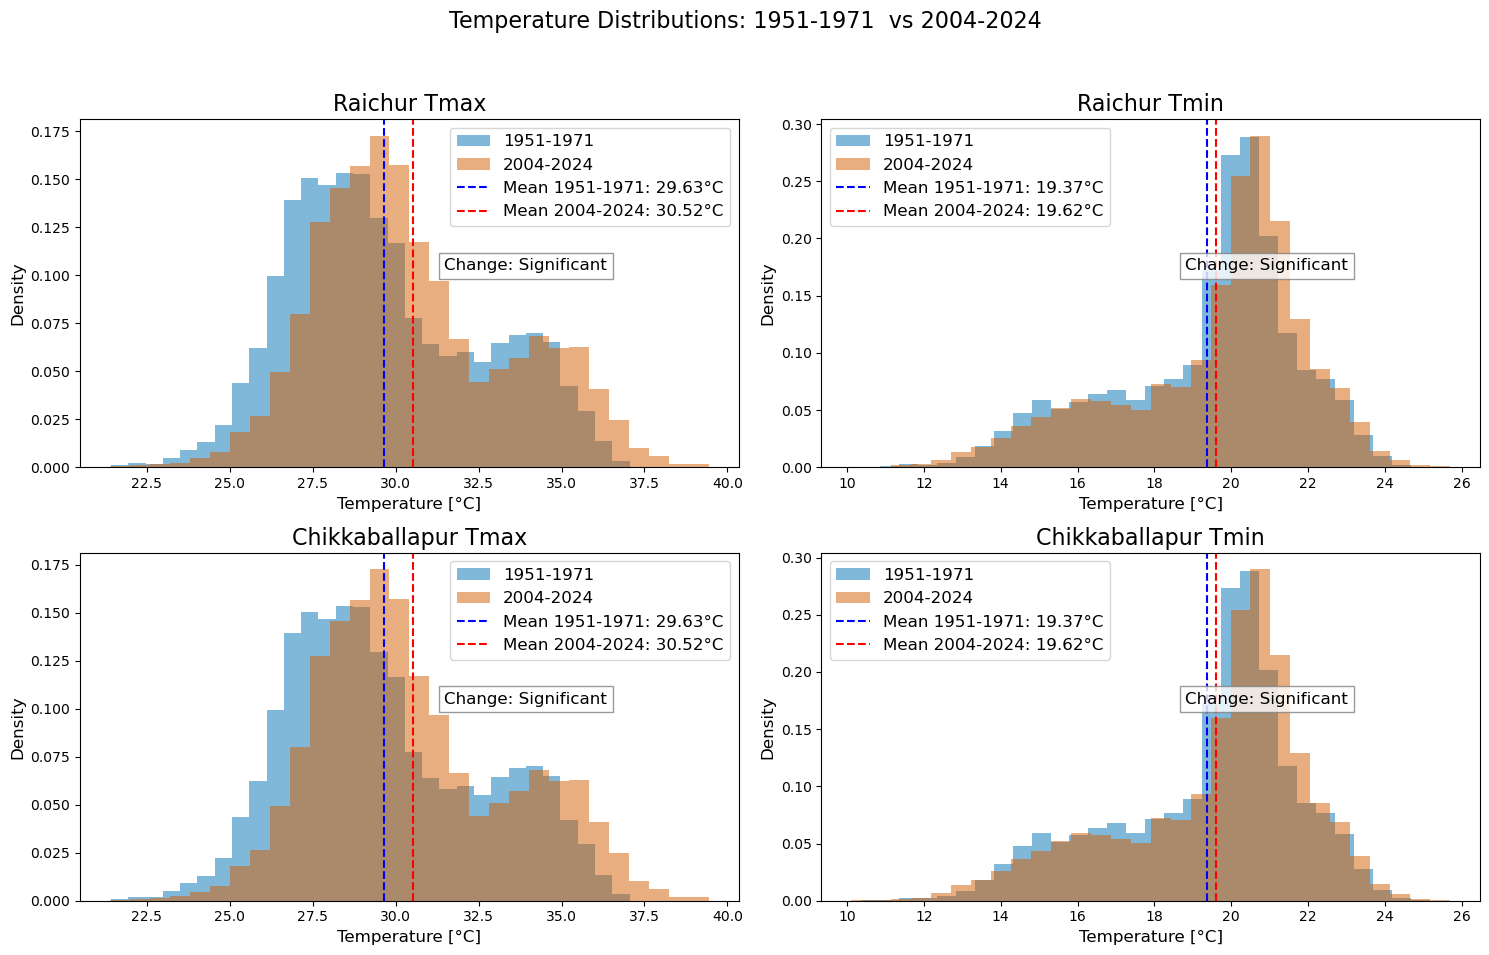


Summary Statistics Table:

         Location/Type     Period  mean  std   min   25%   50%   75%   max
0         Raichur Tmax  1951-1971 29.63 2.92 21.42 27.42 29.09 31.75 37.05
1         Raichur Tmax  2004-2024 30.52 2.92 21.39 28.40 29.97 32.40 39.44
2         Raichur Tmin  1951-1971 19.37 2.38 10.36 18.01 19.98 20.88 25.17
3         Raichur Tmin  2004-2024 19.62 2.45 10.11 18.35 20.30 21.18 25.70
4  Chikkaballapur Tmax  1951-1971 29.63 2.92 21.42 27.42 29.09 31.75 37.05
5  Chikkaballapur Tmax  2004-2024 30.52 2.92 21.39 28.40 29.97 32.40 39.44
6  Chikkaballapur Tmin  1951-1971 19.37 2.38 10.36 18.01 19.98 20.88 25.17
7  Chikkaballapur Tmin  2004-2024 19.62 2.45 10.11 18.35 20.30 21.18 25.70


In [27]:
##### 8.2 Probability distribution of tmax and tmin values ##### 
# Multiple plots (tmax/tmin Raichur/Chikkaballapur)

##### Plotting settings
# Options: Data from all years (e.g. tmax_raich), monthly data (e.g. tmax_raich_monthly_mean) or seasonal data (tmax_raich_kharif)
tmax_location1 = tmax_raich 
tmin_location1 = tmin_raich 
tmax_location1 = tmax_chik
tmin_location1 = tmin_chik 

location1 = "Raichur"
location2 = "Chikkaballapur"

# In this plot, two time periods (e.g. the first two and last decades) of the dataset are compared.
first_start = "1951-01-01" # first_start is the beginning of the first period
first_end = "1971-01-01" # end of the first period
last_start = "2004-01-01" # beginning of the last period
last_end = "2024-12-31" # end of last period
##### End of plotting settings


# Datasets: label and dataframe
datasets = {
    f"{location1} Tmax": tmax_location1,
    f"{location1} Tmin": tmin_location1,
    f"{location2} Tmax": tmax_location1,
    f"{location2} Tmin": tmin_location1
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f"Temperature Distributions: {first_start[:4]}-{first_end[:4]}  vs {last_start[:4]}-{last_end[:4]}", fontsize=16)

summary_data = []

for ax, (label, df) in zip(axs.ravel(), datasets.items()):
    temps_first = df.loc[first_start:first_end]["Temperature"]
    temps_last = df.loc[last_start:last_end]["Temperature"]

    mean_first = temps_first.mean()
    mean_last = temps_last.mean()

    # Descriptive statistics
    summary_first = temps_first.describe()
    summary_last = temps_last.describe()

    # T-test
    t_stat, p_value = stats.ttest_ind(temps_first, temps_last, equal_var=False)
    significance = "Significant" if p_value < 0.05 else "Not Significant"

    # Append to summary
    summary_data.append({
        "Location/Type": label,
        "Period": f"{first_start[:4]}-{first_end[:4]}",
        **summary_first.to_dict(),

    })
    summary_data.append({
        "Location/Type": label,
        "Period": f"{last_start[:4]}-{last_end[:4]}",
        **summary_last.to_dict(),
        "T-stat": t_stat,
        "P-value": p_value
    })

    # Plot histograms
    ax.hist(temps_first, bins=30, alpha=0.5, label=f"{first_start[:4]}-{first_end[:4]}", color="#0072B2", density=True)
    ax.hist(temps_last, bins=30, alpha=0.5, label=f"{last_start[:4]}-{last_end[:4]}", color="#D55E00", density=True)

    # Plot mean lines
    ax.axvline(mean_first, color="blue", linestyle="--", label=f"Mean {first_start[:4]}-{first_end[:4]}: {mean_first:.2f}°C")
    ax.axvline(mean_last, color="red", linestyle="--", label=f"Mean {last_start[:4]}-{last_end[:4]}: {mean_last:.2f}°C")

    # Annotate significance
    ax.text(0.8, 0.6, f"Change: {significance}", transform=ax.transAxes,
            ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

    ax.set_title(label,fontsize=16)
    ax.set_xlabel("Temperature [°C]", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create summary table
summary_df = pd.DataFrame(summary_data)
pd.set_option("display.float_format", lambda x: f"{x:0.2f}")
print("\nSummary Statistics Table:\n")
print(summary_df[[
    "Location/Type", "Period", "mean", "std", "min", "25%", "50%", "75%", "max"]])


In [31]:
##### 9. Checking if there are statistically significant differences in the temperature changes for tmax and tmin over the years. #####

##### Settings
tmax = tmax_raich # Raichur or Chikkaballapur
tmin = tmin_raich # Raichur or Chikkaballapur
##### End of settings

# Reset index to get date as a column
tmax_reg = tmax.rename(columns={tmax.columns[0]: 'Temperature'}).copy()
tmin_reg = tmin.rename(columns={tmin.columns[0]: 'Temperature'}).copy()

tmax['Date'] = tmax.index # Adds a "Date" column based on the date_time type index
tmin['Date'] = tmin.index # Adds a "Date" column based on the date_time type index

tmax['Type'] = 'Max' # Adds a "Type" column to distinguish between max and min temperature records
tmin['Type'] = 'Min' # Adds a "Type" column to distinguish between max and min temperature records

# Combine
combined = pd.concat([tmax, tmin]) # Combines both datasets into one for easier modeling and plotting
combined['Year'] = combined['Date'].dt.year # Extracts year from date
combined['DayOfYear'] = combined['Date'].dt.dayofyear # Gets day of the year
combined['DateOrdinal'] = combined['Date'].map(pd.Timestamp.toordinal) # Converts date into a continuous integer (used for regression)

model = smf.ols('Temperature ~ DateOrdinal * Type', data=combined).fit() # regression using statsmodels.formula.api
print(model.summary())

# Long-term trends in temperature.
# If the slope (DateOrdinal) is positive, it suggests warming over time.
# The interaction tells if Min and Max temps are changing at different rates.

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 5.484e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:23:02   Log-Likelihood:            -1.4417e+05
No. Observations:               54058   AIC:                         2.883e+05
Df Residuals:                   54054   BIC:                         2.884e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
# # Summary, how to understand the example ressult 
# Metric	Value	Interpretation
# R-squared	0.007	Only 0.7% of the temperature variation is explained by the model. This is very low, meaning the linear trend with time explains very little of what's going on.
# Adj. R-squared	0.007	Same as R² here, since only one predictor.
# F-statistic	363.6	Tests whether the model as a whole is statistically significant. High value means yes.
# Prob (F-statistic)	8.45e-81	This is very significant (much less than 0.05), so the relationship between DateOrdinal and Temperature is statistically significant, but...
# No. Observations	54,058	A large dataset — so even small effects become statistically significant.
# Durbin-Watson	0.078	Indicates very strong autocorrelation in residuals. A value near 2 is good; ~0 is bad. This is a problem.
# AIC/BIC	Model fit metrics; lower is better — not useful here unless comparing multiple models.

# Intercept	4.4457	0.003	The expected temperature when DateOrdinal = 0 (Jan 1 of year 1 CE). Not meaningful practically — just a mathematical anchor.
# DateOrdinal	3.955e-05	0.000	Each day, temperature increases by ~0.00004°C. Over a year (365 days), this is ~0.0145°C increase/year — a tiny upward trend. But it's statistically significant due to large sample size.

C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2047314249.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_t_first = t_first.groupby('month')['Temperature'].mean()
C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2047314249.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_t_last = t_last.groupby('month')['Temperature'].mean()
C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2047314249.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_t_first.index, rotation=45)


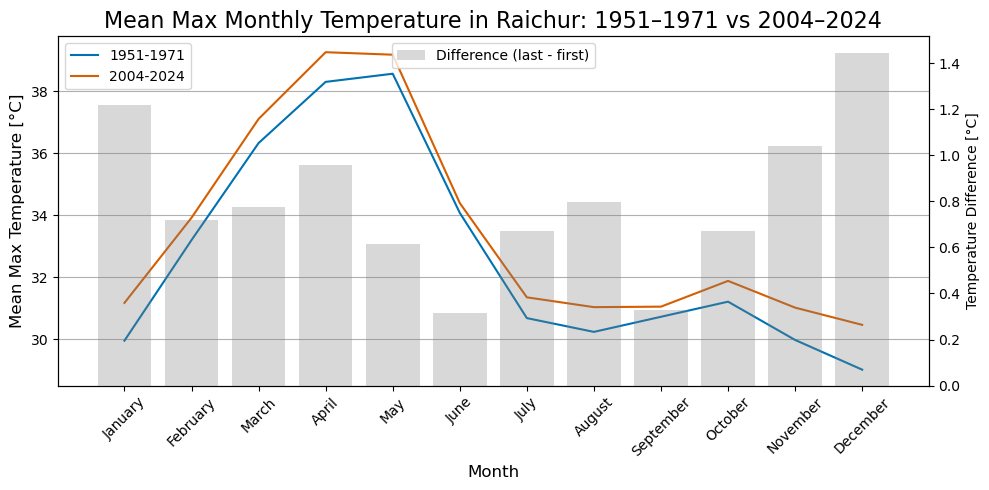

In [33]:
##### 10.1 Monthly temperature change (could be adjusted to e.g. weekly) (single plot) ##### 

##### Plotting settings
t = tmax_raich_monthly_mean  # Temperature dataset
t_type = "Max" # Max or Min. Will be used to update the name of the plot
location = "Raichur"

# In this plot, two time periods (e.g. the first two and last decades) of the dataset are compared. Here, two decades are compared
first_start = "1951-01-01" # first_start is the beginning of the first period
first_end = "1971-01-01" # end of the first period
last_start = "2004-01-01" # beginning of the last period
last_end = "2024-12-31" # end of last period
##### End of plotting settings

# Extracting the monthly values for the first and last x years of observations
t_first = t[(t.index >= first_start) & (t.index <= first_end)].copy()
t_last = t[(t.index >= last_start) & (t.index<= last_end )].copy()

# Adding "month" column

t_first['month'] = t_first.index.month_name()
t_last['month'] = t_last.index.month_name()


# To keep calendar order:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

t_first['month'] = pd.Categorical(t_first['month'], categories=month_order, ordered=True)
t_last['month'] = pd.Categorical(t_last['month'], categories=month_order, ordered=True)


# Monthly averages in the first and last x years

avg_t_first = t_first.groupby('month')['Temperature'].mean()
avg_t_last = t_last.groupby('month')['Temperature'].mean()

# Calculate difference
temp_diff = avg_t_last - avg_t_first

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Line plots for both decades
ax1.plot(avg_t_first.index, avg_t_first, label=f"{first_start[:4]}-{first_end[:4]}", color='#0072B2')
ax1.plot(avg_t_last.index, avg_t_last, label=f"{last_start[:4]}-{last_end[:4]}", color='#D55E00')
ax1.set_ylabel(f'Mean {t_type} Temperature [°C]', fontsize=12)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_xticklabels(avg_t_first.index, rotation=45)
ax1.grid(axis='y')
ax1.legend(loc='upper left')


# Add bar plot for difference
ax2 = ax1.twinx()
ax2.bar(temp_diff.index, temp_diff.values, color='gray', alpha=0.3, label='Difference (last - first)')
ax2.set_ylabel('Temperature Difference [°C]')
ax2.legend(loc='upper center')

plt.title(f"Mean {t_type} Monthly Temperature in {location}: {first_start[:4]}–{first_end[:4]} vs {last_start[:4]}–{last_end[:4]}", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\48512\AppData\Local\Temp\ipykernel_24916\3580600756.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_t_first = t_first.groupby('month')['Temperature'].mean()
C:\Users\48512\AppData\Local\Temp\ipykernel_24916\3580600756.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_t_last = t_last.groupby('month')['Temperature'].mean()
C:\Users\48512\AppData\Local\Temp\ipykernel_24916\3580600756.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

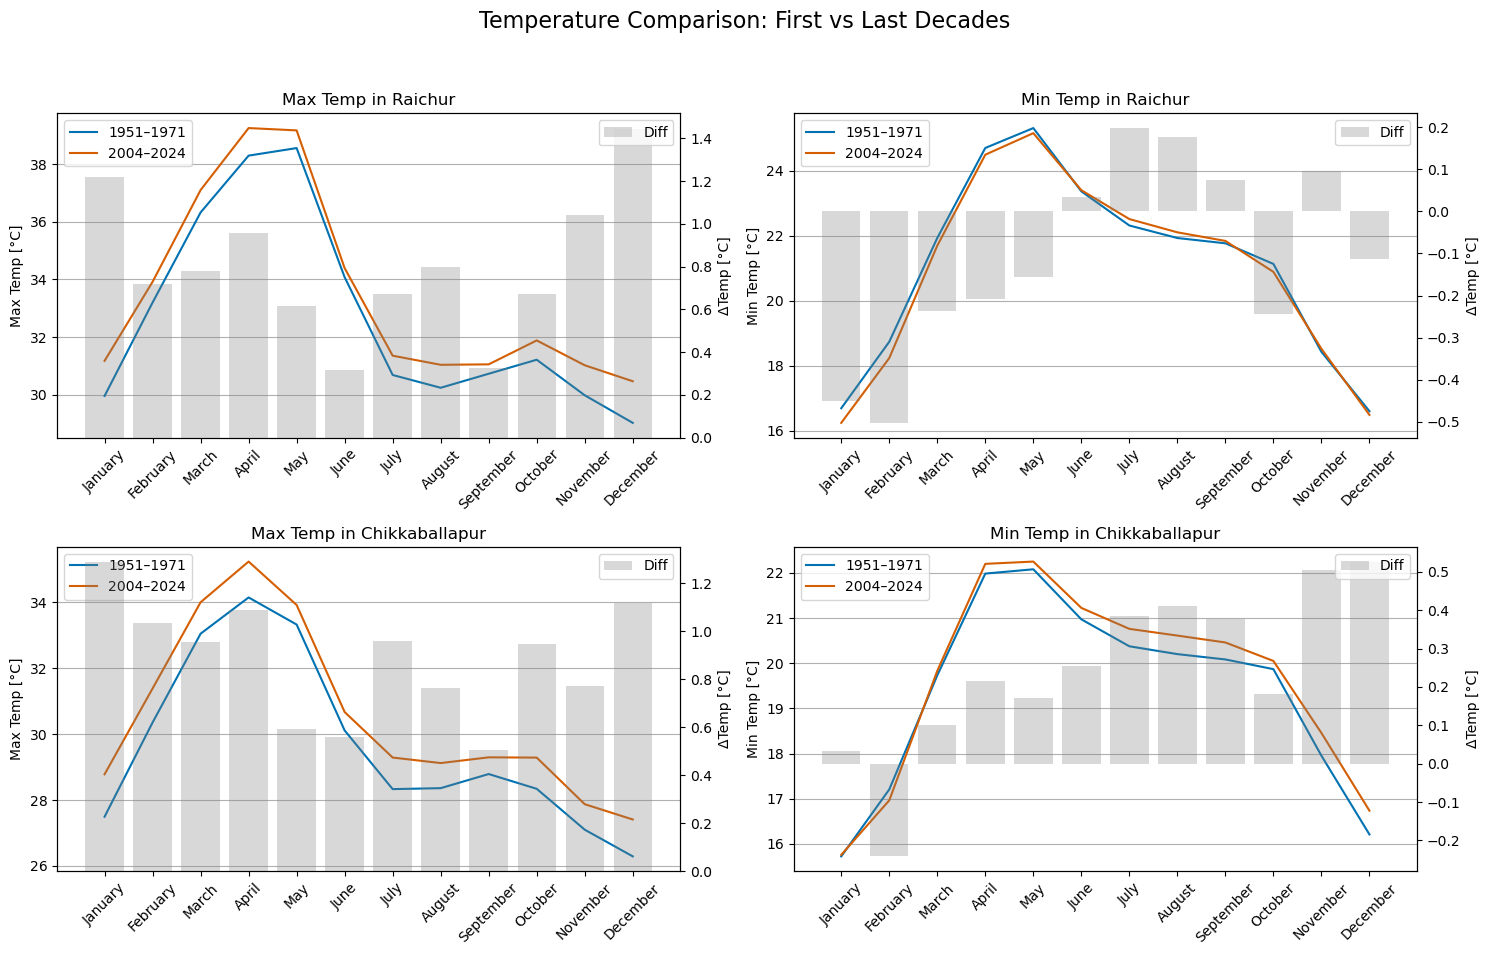

In [61]:
##### 10.2 Monthly temperature change (could be adjusted to e.g. weekly) (multiple plots) ##### 

##### Plotting settings
t_max_loc1 = tmax_raich_monthly_mean  # Temperature dataset
t_min_loc1 = tmin_raich_monthly_mean  # Temperature dataset
t_max_loc2 = tmax_chik_monthly_mean  # Temperature dataset
t_min_loc2 = tmin_chik_monthly_mean  # Temperature dataset
t_type_max = "Max" # Max or Min. Will be used to update the name of the plot
t_type_min = "Min" # Max or Min. Will be used to update the name of the plot
location1 = "Raichur"
location2 = "Chikkaballapur"

first_start = "1951-01-01"
first_end = "1971-01-01"
last_start = "2004-01-01"
last_end = "2024-12-31"

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

location1 = "Raichur"
location2 = "Chikkaballapur"

datasets = {
    ('Max', f'{location1}'): t_max_loc1,
    ('Min', f'{location1}'): t_min_loc1,
    ('Max', f'{location2}'): t_max_loc2,
    ('Min', f'{location2}'): t_min_loc2,
}
##### End plotting settings


def process_temperature_data(t, first_start, first_end, last_start, last_end):
    # Slice for periods
    t_first = t[(t.index >= first_start) & (t.index <= first_end)].copy()
    t_last = t[(t.index >= last_start) & (t.index <= last_end)].copy()

    # Add month
    t_first['month'] = pd.Categorical(t_first.index.month_name(), categories=month_order, ordered=True)
    t_last['month'] = pd.Categorical(t_last.index.month_name(), categories=month_order, ordered=True)

    # Group by month and calculate mean
    avg_t_first = t_first.groupby('month')['Temperature'].mean()
    avg_t_last = t_last.groupby('month')['Temperature'].mean()

    # Difference
    temp_diff = avg_t_last - avg_t_first

    return avg_t_first, avg_t_last, temp_diff


def plot_subplot(ax, avg_first, avg_last, diff, t_type, location):
    ax2 = ax.twinx()

    ax.plot(avg_first.index, avg_first, label=f"{first_start[:4]}–{first_end[:4]}", color='#0072B2')
    ax.plot(avg_last.index, avg_last, label=f"{last_start[:4]}–{last_end[:4]}", color='#D55E00')
    ax.set_ylabel(f'{t_type} Temp [°C]')
    ax.set_xticks(range(12))
    ax.set_xticklabels(avg_first.index, rotation=45)
    ax.grid(axis='y')
    ax.legend(loc='upper left')

    ax2.bar(diff.index, diff.values, color='gray', alpha=0.3, label='Diff')
    ax2.set_ylabel('ΔTemp [°C]')
    ax2.legend(loc='upper right')

    ax.set_title(f"{t_type} Temp in {location}", fontsize=12)


# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, ((t_type, location), data) in enumerate(datasets.items()):
    avg_first, avg_last, diff = process_temperature_data(data, first_start, first_end, last_start, last_end)
    plot_subplot(axs[i], avg_first, avg_last, diff, t_type, location)

plt.suptitle("Temperature Comparison: First vs Last Decades", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [63]:
#####  11.1 Decadal (or different) moving warming rate. Function definition ##### 
# Function to calculate the moving decadal mean temperature
def moving_decadal_rate(df, window=10): # df is a dataframe with temperature, e.g. tmax_raich, tmin_raich_kharif. Window = 10 for decadal warmin rate
    rates = []
    years = []

    for i in range(len(df) - window + 1):
        sub_df = df.iloc[i:i+window]
        x = sub_df.index.year
        y = sub_df['Temperature'].values
        
        # Linear regression
        slope, _, _, _, _ = linregress(x, y)
        decadal_rate = slope * 10  # °C per decade

        # Save center year of the window and rate
        center_year = x[0] + (x[-1] - x[0]) // 2
        years.append(center_year)
        rates.append(decadal_rate)

    return pd.DataFrame({'Year': years, 'DecadalWarmingRate': rates})

    Year  DecadalWarmingRate
0   1955                0.16
1   1956                0.31
2   1957                0.37
3   1958                0.39
4   1959                0.54
..   ...                 ...
60  2015               -0.07
61  2016               -0.76
62  2017               -0.91
63  2018               -1.07
64  2019               -1.19

[65 rows x 2 columns]


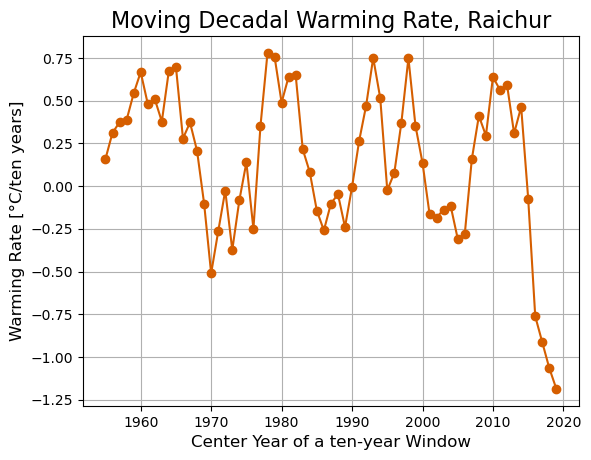

In [65]:
#####  11.2 Plotting decadal warming rate (single plot) ##### 
# Settings
df_t = tmax_raich_yearly_mean
time = 10 # 20 for 20-year window of warming ect.
time_string = "ten" # same as above, used for the plot title
location = "Raichur"
# End settings

decadal_trends = moving_decadal_rate(df_t, window=time)
print(decadal_trends)

plt.plot(decadal_trends['Year'], decadal_trends['DecadalWarmingRate'], marker='o', color="#D55E00")
plt.xlabel(f'Center Year of a {time_string}-year Window', fontsize = 12)
plt.ylabel(f'Warming Rate [°C/{time_string} years]', fontsize = 12)
plt.title(f'Moving Decadal Warming Rate, {location}', fontsize = 16)
plt.grid(True)
plt.show()

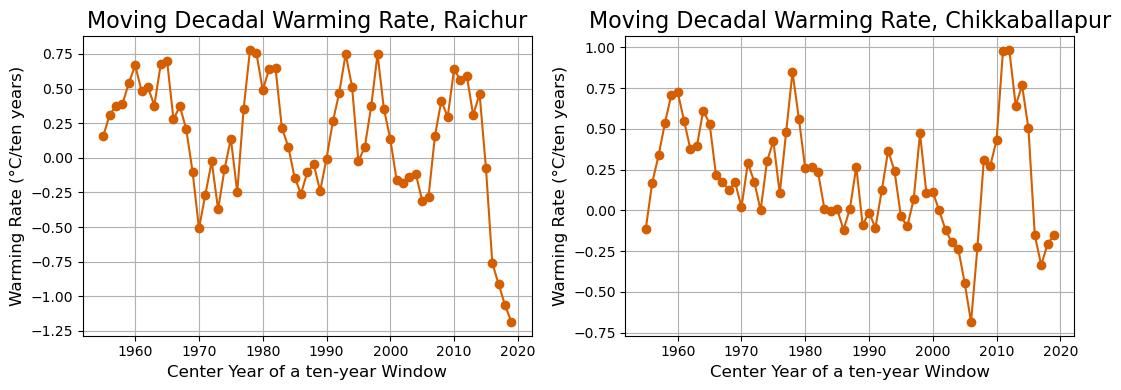

In [67]:
#####  11.3 Plotting decadal warming rate (multiple plots) ##### 

# Settings
df_t_1 = tmax_raich_yearly_mean
time_1 = 10 # 20 for 20-year window of warming ect.
time_string_1 = "ten" # same as above, used for the plot title
location_1 = "Raichur"
df_t_2 = tmax_chik_yearly_mean
time_2 = 10 # 20 for 20-year window of warming ect.
time_string_2 = "ten" # same as above, used for the plot title
location_2 = "Chikkaballapur"
# End settings

decadal_trends_1 = moving_decadal_rate(df_t_1, window=time_1)
decadal_trends_2 = moving_decadal_rate(df_t_2, window=time_2)


# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharex=True)

# Plot for Raichur
axs[0].plot(decadal_trends_1['Year'], decadal_trends_1['DecadalWarmingRate'], marker='o', color="#D55E00")
axs[0].set_title('Moving Decadal Warming Rate, Raichur', fontsize=16)
axs[0].set_xlabel(f'Center Year of a {time_string_1}-year Window', fontsize=12)
axs[0].set_ylabel(f'Warming Rate (°C/{time_string_2} years)', fontsize=12)
axs[0].grid(True)

# Plot for Chikkabalapur
axs[1].plot(decadal_trends_2['Year'], decadal_trends_2['DecadalWarmingRate'], marker='o', color="#D55E00")
axs[1].set_title(f'Moving Decadal Warming Rate, {location_2}', fontsize=16)
axs[1].set_xlabel(f'Center Year of a {time_string_2}-year Window', fontsize=12)
axs[1].set_ylabel(f'Warming Rate (°C/{time_string_2} years)', fontsize=12)
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [69]:
#####  11.4  Correlation in warming/cooling decadal trends between regions ##### 

correlations = decadal_trends_1['DecadalWarmingRate'].corr(decadal_trends_2['DecadalWarmingRate'])
print(correlations)

0.6986320243131551


In [71]:
#####  12.1 Temperature anomalies. Preparing a new df. Calculating climatology ##### 

# Settings

t_max_1 = tmax_raich
t_max_2 = tmax_chik
t_min_1 = tmin_raich
t_min_2 = tmin_chik
location_1 = "Raichur"
location_2 = "Chikkaballapur"

# End settings

dates = tmax_raich.index
n_days = len(dates)

# # Create dummy Tmax and Tmin data with seasonal variation and random noise
# def generate_temperature_data(base_temp, noise_level=5):
#     seasonal_cycle = 10 * np.sin(2 * np.pi * dates.dayofyear / 365.25)
#     noise = np.random.normal(0, noise_level, n_days)
#     return base_temp + seasonal_cycle + noise


df = pd.DataFrame({
    'Date': t_max_1.index,
    f'Tmax_{location_1}': t_max_1['Temperature'],
    f'Tmin_{location_1}': t_min_1['Temperature'],
    f'Tmax_{location_2}': t_max_2['Temperature'],
    f'Tmin_{location_2}': t_min_2['Temperature']
})

# Calculate mean temperature for regions
df[f'Tmean_{location_1}'] = (df[f'Tmax_{location_1}'] + df[f'Tmin_{location_1}']) / 2
df[f'Tmean_{location_2}'] = (df[f'Tmax_{location_2}'] + df[f'Tmin_{location_2}']) / 2

# Add year and day of the year for grouping
df['Year'] = df['Date'].dt.year
df['DOY'] = df['Date'].dt.dayofyear

##################################################################
# Compute climatology for location1
climatology_1 = df.groupby('DOY')[[f'Tmax_{location_1}', f'Tmin_{location_1}']].mean()

# Compute anomalies
df_1 = df.merge(climatology_1, on='DOY', suffixes=('', '_clim'))
df_1['Tmax_Anomaly'] = df_1[f'Tmax_{location_1}'] - df_1[f'Tmax_{location_1}_clim']
df_1['Tmin_Anomaly'] = df_1[f'Tmin_{location_1}'] - df_1[f'Tmin_{location_1}_clim']

##################################################################
# Compute climatology for location2
climatology_2 = df.groupby('DOY')[[f'Tmax_{location_2}', f'Tmin_{location_2}']].mean()

# Compute anomalies
df_2 = df.merge(climatology_2, on='DOY', suffixes=('', '_clim'))
df_2['Tmax_Anomaly'] = df_2[f'Tmax_{location_2}'] - df_2[f'Tmax_{location_2}_clim']
df_2['Tmin_Anomaly'] = df_2[f'Tmin_{location_2}'] - df_2[f'Tmin_{location_2}_clim']

Text(40.66700000000001, 0.5, 'Year')

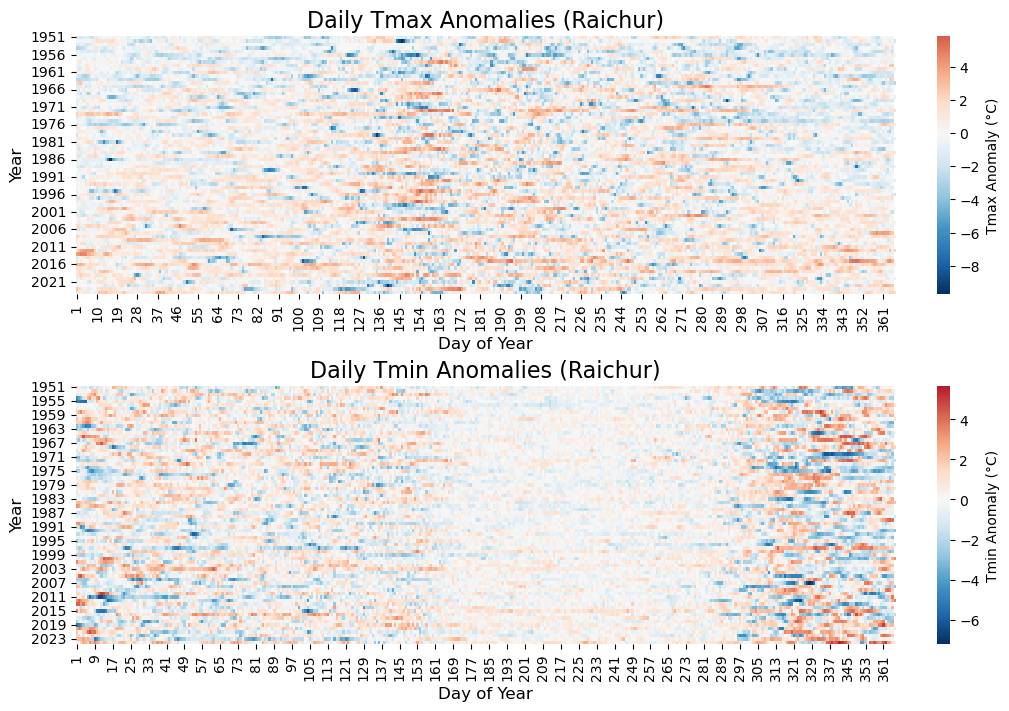

In [73]:
#####  12.2 Temperature anomalies. Plotting anomalies. ##### 
# Settings
df = df_1 # Which df generated above should be used
location = "Raichur"
# End settings

heatmap_data_tmax = df.pivot_table(index='Year', columns='DOY', values='Tmax_Anomaly')
heatmap_data_tmin = df.pivot_table(index='Year', columns='DOY', values='Tmin_Anomaly')

# Prepare data for boxplots/violin plots
df['Decade'] = (df['Year'] // 10) * 10

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 7), constrained_layout=True)

# Heatmap for Tmax anomalies
sns.heatmap(heatmap_data_tmax, cmap='RdBu_r', center=0, ax=axs[0], cbar_kws={'label': 'Tmax Anomaly (°C)'})
axs[0].set_title(f'Daily Tmax Anomalies ({location})', fontsize=16)
axs[0].set_xlabel('Day of Year', fontsize=12)
axs[0].set_ylabel('Year', fontsize=12)

# Heatmap for Tmin anomalies
sns.heatmap(heatmap_data_tmin, cmap='RdBu_r', center=0, ax=axs[1], cbar_kws={'label': 'Tmin Anomaly (°C)'})
axs[1].set_title(f'Daily Tmin Anomalies ({location})', fontsize=16)
axs[1].set_xlabel('Day of Year', fontsize=12)
axs[1].set_ylabel('Year', fontsize=12)

In [75]:
#####  13.1 Setting a threshold of a hot/cold day. Function definition ##### 
# Calculate the xth percentile in the first x years 
# defining the function to set a threshold here
# 40*C were picked as a threshold connected to the critical climate stress moments, 
# wchich corresponded to 0.965th percentile of the hottest days for Raichur

def get_percentile(df, location, years, percentile, column_index=0): 
    
    # Get the start and end date
    start_date = df.index.min()
    end_date = start_date + pd.DateOffset(years=years)
    
    # Filter the data
    df_subset = df.loc[start_date:end_date]
    
    # Select the column by index
    data_column = df_subset.iloc[:, column_index]
    
    # Calculate the percentile
    threshold = data_column.quantile(percentile)
    
    print(f"{int(percentile*100)}th percentile in {location} over first {years} years ({start_date.date()} to {end_date.date()}): {threshold:.2f}")
    return threshold

In [125]:
#####  13.2 Setting a treshold of a hot day.  ##### 

# Treshold settings
first_years = 20 # how many first years of the dataset to set the treshold,
percentile_value = 0.965 # what percentile, if top 10% of highest values then 0.9 and so on
location1 = "Raichur"
t_max_loc1 = tmax_raich # For a hot day
t_min_loc1 = tmin_raich # For a cold day

location2 = "Chikkaballapur"
t_max_loc2 = tmax_chik # For a hot day
t_min_loc2 = tmin_chik # For a cold day

In [127]:
#####  13.3 Setting a treshold of a hot day. Calculating the thresholds ##### 
# Raichur
threshold_loc1_hot = round(get_percentile(t_max_loc1, location=f"{location1}", years=first_years, percentile=percentile_value), 2) # Rounding to 0 decimal places of temperature
threshold_loc1_cold = round(get_percentile(t_min_loc1, location=f"{location1}", years=first_years, percentile = 1 - percentile_value) , 2) 

# Chikkaballapur
threshold_loc2_hot = round(get_percentile(t_max_loc2, location=f"{location2}", years=first_years, percentile=percentile_value), 2) # Rounding to 0 decimal places of temperature
threshold_loc2_cold = round(get_percentile(t_min_loc2, location=f"{location2}", years=first_years, percentile = 1 - percentile_value) , 2) 




96th percentile in Raichur over first 20 years (1951-01-01 to 1971-01-01): 40.01
3th percentile in Raichur over first 20 years (1951-01-01 to 1971-01-01): 14.96
96th percentile in Chikkaballapur over first 20 years (1951-01-01 to 1971-01-01): 35.21
3th percentile in Chikkaballapur over first 20 years (1951-01-01 to 1971-01-01): 14.33


In [129]:
#####  14. Function definition. Counting hot days ##### 
# Now I want to count the number of days above a certain threshold in both regions
# Defining a function that calculates the no of days above the threshold

def count_hot_days_per_year(df, threshold, column_index=0):
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)
    
    # Select the relevant column by index
    temp_series = df.iloc[:, column_index]
    
    # Filter for days above threshold
    hot_days = temp_series[temp_series > threshold]
    
    # Group by year and count
    hot_days_per_year = hot_days.groupby(hot_days.index.year).count()
    
    return hot_days_per_year

In [131]:
#####  15. Function to count cold days ##### 
def count_cold_days_per_year(df, threshold, column_index=0):
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)
    
    # Select the relevant column by index
    temp_series = df.iloc[:, column_index]
    
    # Filter for days above threshold
    cold_days = temp_series[temp_series < threshold]
    
    # Group by year and count
    cold_days_per_year = cold_days.groupby(cold_days.index.year).count()
    
    return cold_days_per_year

In [147]:
#####  16. Function to plot the number of hot days ##### 
def plot_hot_days_with_trend(hot_day_counts, threshold, location):
    # Convert index and values to numpy arrays
    years = hot_day_counts.index.values
    counts = hot_day_counts.values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(years, counts)
    trend_line = slope * years + intercept

    # Fit a linear trend line
    z = np.polyfit(years, counts, 1)  # 1 = linear
    p = np.poly1d(z)  # Create a polynomial object

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(years, counts, color='#E69F00', label='Hot Days')

    # Plot trend line
    plt.plot(years, trend_line, color='#D55E00', linewidth=2, label='Trend line')

     # Fit a linear trend line
    z = np.polyfit(years, counts, 1)  # 1 = linear
    p = np.poly1d(z)  # Create a polynomial object
    
     # Add equation text
    equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
    plt.text(years.min(), 30, equation, fontsize=12, color='#D55E00')


    # Labels and title
    plt.title(f'Days above {threshold:.0f}°C per year in {location}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Hot Days', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [149]:
#####  17. Function to plot the number of cold days ##### 
def plot_cold_days_with_trend(cold_day_counts, threshold, location):
    # Convert index and values to numpy arrays
    years = cold_day_counts.index.values
    counts = cold_day_counts.values

    # Fit a linear trend line
    z = np.polyfit(years, counts, 1)  # 1 = linear
    p = np.poly1d(z)  # Create a polynomial object

    # Plot bar chart
    plt.figure(figsize=(12, 5))
    plt.bar(years, counts, color='#56B4E9', label='Cold Days')

    # Plot trend line
    plt.plot(years, p(years), color='#0072B2', linewidth=2, label='Trend line', )

    # Add equation text
    equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
    plt.text(years.min(), 30, equation, fontsize=12, color='#0072B2')

    # Labels and title
    plt.title(f'Days below {threshold:.0f}°C per year in {location}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Cold Days', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [151]:
#####  18. Counting the hot and cold days in both locations ##### 

# Raichur
hot_day_counts_loc1 = count_hot_days_per_year(t_max_loc1, threshold_loc1_hot)
cold_day_counts_loc1 = count_cold_days_per_year(t_min_loc1, threshold_loc1_cold)

# Chikaballapur
hot_day_counts_loc2 = count_hot_days_per_year(t_max_loc2, threshold_loc2_hot)
cold_day_counts_loc2 = count_cold_days_per_year(t_min_loc2, threshold_loc2_cold)


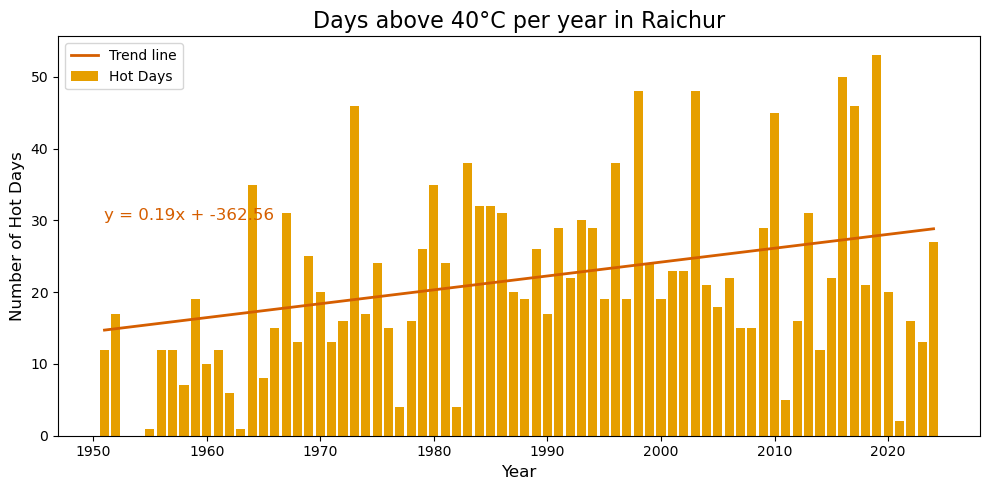

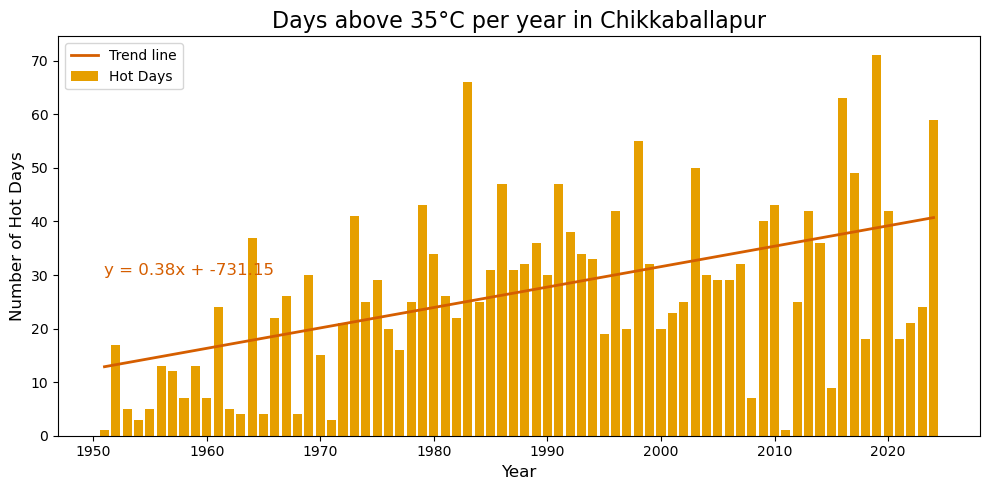

In [155]:
#####  19. Plotting number of hot days ##### 

# Raichur hot
plot_hot_days_with_trend(hot_day_counts_loc1, threshold_loc1_hot, location=location1)

# Chikkaballapur hot
plot_hot_days_with_trend(hot_day_counts_loc2, threshold_loc2_hot, location=location2)

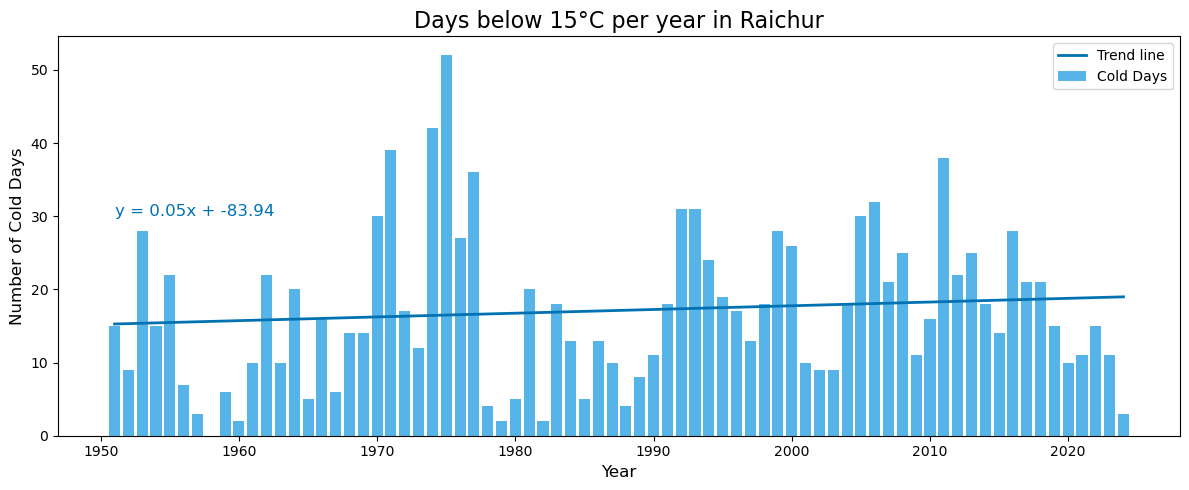

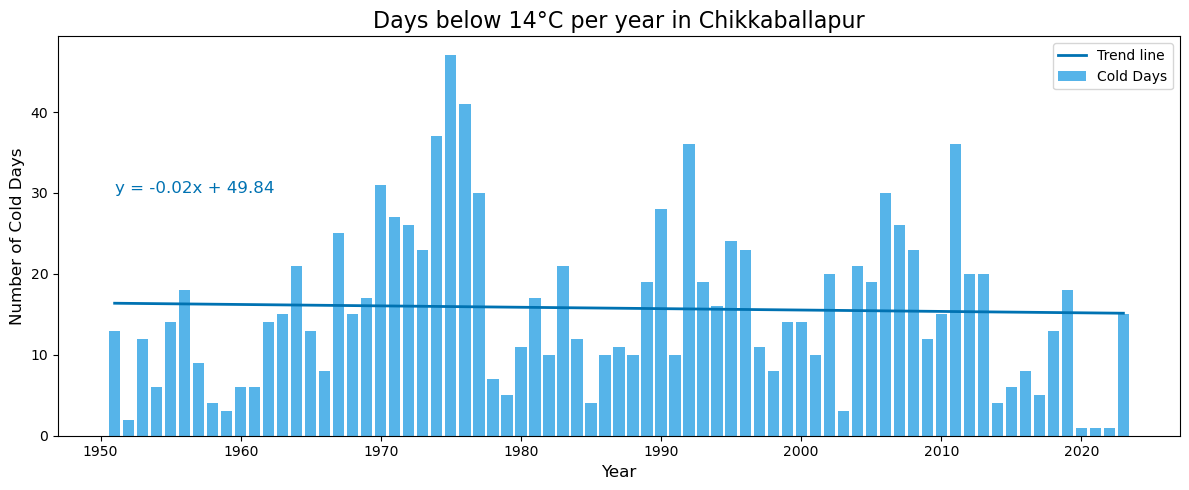

In [157]:
#####  20. Plotting cold days ##### 

# Raichur cold
plot_cold_days_with_trend(cold_day_counts_loc1, threshold_loc1_cold, location=location1)

# Chikaballapur cold
plot_cold_days_with_trend(cold_day_counts_loc2, threshold_loc2_cold, location=location2)


In [159]:
#####  21. Variation in the number of hot/cold days ##### 

variation_loc1 = np.std(hot_day_counts_loc1)
print(f'Variation in the number of hot days in {location1} is {variation_loc1:.0f}')
variation_loc2 = np.std(hot_day_counts_loc2)
print(f'Variation in the number of hot days in {location2} is {variation_loc2:.0f}')

Variation in the number of hot days in Raichur is 12
Variation in the number of hot days in Chikkaballapur is 16


In [161]:
#####  21. The rate of change of the number of hot days, different in two regions? ##### 

df1 = pd.DataFrame({'Year': hot_day_counts_loc1.index, 'Hot_Days': hot_day_counts_loc1.values, 'Region': 'location_1'})
df2 = pd.DataFrame({'Year': hot_day_counts_loc2.index, 'Hot_Days': hot_day_counts_loc2.values, 'Region': 'location_2'})
combined_rate_hot_days = pd.concat([df1, df2])

model = smf.ols('Hot_Days ~ Year * Region', data=combined_rate_hot_days).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Hot_Days   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     13.84
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           5.76e-08
Time:                        15:08:17   Log-Likelihood:                -578.82
No. Observations:                 146   AIC:                             1166.
Df Residuals:                     142   BIC:                             1178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [163]:
#####  22. First hot day in the year. Function definition ##### 

# Defining a function to calculate the first hot day in each location
def first_hot_day_each_year(df, threshold, column_index=0):
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)

    # Select the temperature column by index
    temp_series = df.iloc[:, column_index]

    # Create a DataFrame to hold results
    first_hot_days = []

    # Group by year
    for year, group in temp_series.groupby(temp_series.index.year):
        # Filter for hot days
        hot_days = group[group > threshold]
        if not hot_days.empty:
            # Get the first occurrence
            first_day = hot_days.index.min()
            # Get day-of-year for comparison across years
            day_of_year = first_day.dayofyear
            first_hot_days.append({'year': year, 'date': first_day, 'day_of_year': day_of_year})
        else:
            # Optional: handle years with no hot days
            first_hot_days.append({'year': year, 'date': None, 'day_of_year': None})

    
# Convert to DataFrame
    result_df = pd.DataFrame(first_hot_days)
    return result_df

In [167]:
# 23. First cold day in a year. Function definition
def first_cold_day_each_year(df, threshold, column_index=0):
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)

    # Select the temperature column by index
    temp_series = df.iloc[:, column_index]

    # Create a DataFrame to hold results
    first_cold_days = []

    # Group by year
    for year, group in temp_series.groupby(temp_series.index.year):
        # Filter for hot days
        cold_days = group[group < threshold]
        if not cold_days.empty:
            # Get the first occurrence
            first_day = cold_days.index.min()
            # Get day-of-year for comparison across years
            day_of_year = first_day.dayofyear
            first_cold_days.append({'year': year, 'date': first_day, 'day_of_year': day_of_year})
        else:
            # Optional: handle years with no hot days
            first_cold_days.append({'year': year, 'date': None, 'day_of_year': None})

    
# Convert to DataFrame
    result_df = pd.DataFrame(first_cold_days)
    return result_df

In [169]:
#####  24. Last hot day in a year. Function definition ##### 
def last_hot_day_each_year(df, threshold, column_index=0):
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)

    # Select the temperature column by index
    temp_series = df.iloc[:, column_index]

    # Create a DataFrame to hold results
    last_hot_days = []

    # Group by year
    for year, group in temp_series.groupby(temp_series.index.year):
        # Filter for hot days
        hot_days = group[group > threshold]
        if not hot_days.empty:
            # Get the first occurrence
            last_day = hot_days.index.max()
            # Get day-of-year for comparison across years
            day_of_year = last_day.dayofyear
            last_hot_days.append({'year': year, 'date': last_day, 'day_of_year': day_of_year})
        else:
            # Optional: handle years with no hot days
            last_hot_days.append({'year': year, 'date': None, 'day_of_year': None})

    
# Convert to DataFrame
    result_df = pd.DataFrame(last_hot_days)
    return result_df

In [171]:
#####  25. Calculating the first/last hot/cold day in a year ##### 

# Raichur
first_hot_loc1 = first_hot_day_each_year(t_max_loc1, treshold_loc1_hot, column_index=0)
first_cold_loc1 = first_cold_day_each_year(t_min_loc1, treshold_loc1_cold, column_index=0)
last_hot_loc1 = last_hot_day_each_year(t_max_loc1, treshold_loc1_hot, column_index=0)

# Chikkaballapur
first_hot_loc2 = first_hot_day_each_year(t_max_loc2, treshold_loc2_hot, column_index=0)
first_cold_loc2 = first_cold_day_each_year(t_min_loc2, treshold_loc2_cold, column_index=0)
last_hot_loc2 = last_hot_day_each_year(t_max_loc2, treshold_loc2_hot, column_index=0)


In [211]:
#####  26. Function for plotting the first hot day ##### 
def plot_first_hot_day(first_hot_df, threshold, location):

     # Filter out rows with NaN values (years with no hot day)
    plot_df = first_hot_df.dropna(subset=['day_of_year'])

    # Extract x (year) and y (day of year)
    x = plot_df['year'].values
    y = plot_df['day_of_year'].values

    # Fit a linear trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trend = p(x)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(plot_df['year'], plot_df['day_of_year'], marker='o', color="#E69F00")
    plt.plot(x, trend, linewidth=2, label='Trend Line', color="#D55E00")

     # Add trendline equation as text on the plot
    slope, intercept = z
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(x.min(), y.min(), equation_text, fontsize=12, color="#D55E00")
    
    plt.title(f"First Day <{threshold:.0f}°C Each Year in {location}", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Day of Year (1 = Jan 1)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [223]:
#####  27. Function for plotting the last hot day ##### 
def plot_last_hot_day(last_hot_df, threshold, location):

    # Filter out rows with NaN values (years with no hot day)
    plot_df = last_hot_df.dropna(subset=['day_of_year'])

    # Extract x (year) and y (day of year)
    x = plot_df['year'].values
    y = plot_df['day_of_year'].values

    # Fit a linear trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trend = p(x)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(plot_df['year'], plot_df['day_of_year'], marker='o', color="#E69F00")
    plt.plot(x, trend, linewidth=2, label='Trend Line', color="#D55E00")
    
    # Add trendline equation as text on the plot
    slope, intercept = z
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(x.min(), y.min(), equation_text, fontsize=12, color="#D55E00")
    
    plt.title(f"Last Day >{threshold:.0f}°C Each Year in {location}", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Day of Year (1 = Jan 1)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [227]:
#####  28. Function for plotting the first cold day ##### 
def plot_first_cold_day(first_cold_df, threshold, location):

    # Filter out rows with NaN values (years with no hot day)
    plot_df = first_hot_df.dropna(subset=['day_of_year'])

    # Extract x (year) and y (day of year)
    x = plot_df['year'].values
    y = plot_df['day_of_year'].values

    # Fit a linear trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trend = p(x)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(plot_df['year'], plot_df['day_of_year'], marker='o', color="#56B4E9")
    plt.plot(x, trend, linewidth=2, label='Trend Line', color="#0072B2")

    # Add trendline equation as text on the plot
    slope, intercept = z
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(x.min(), y.min(), equation_text, fontsize=12, color="#0072B2")
    
    # Title and labels
    
    plt.title(f"First Day >{threshold:.0f}°C Each Year in {location}", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Day of Year (1 = Jan 1)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

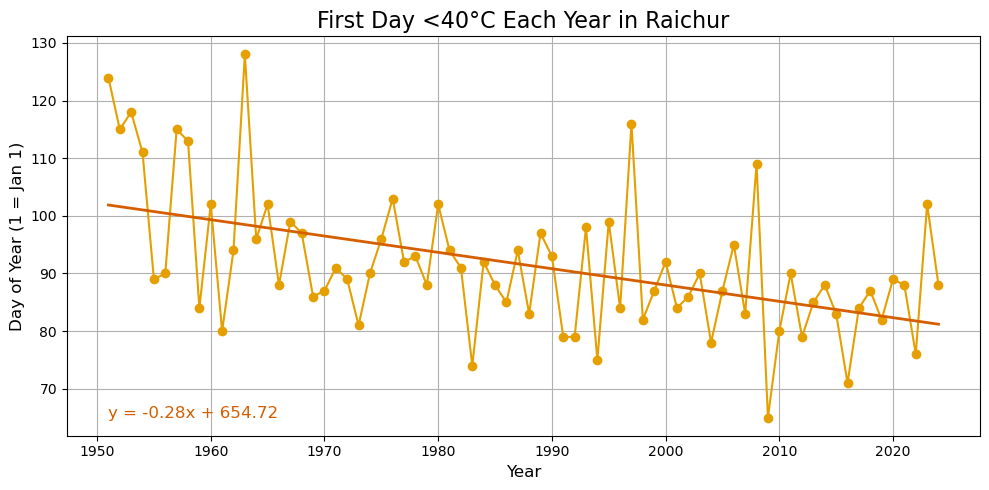

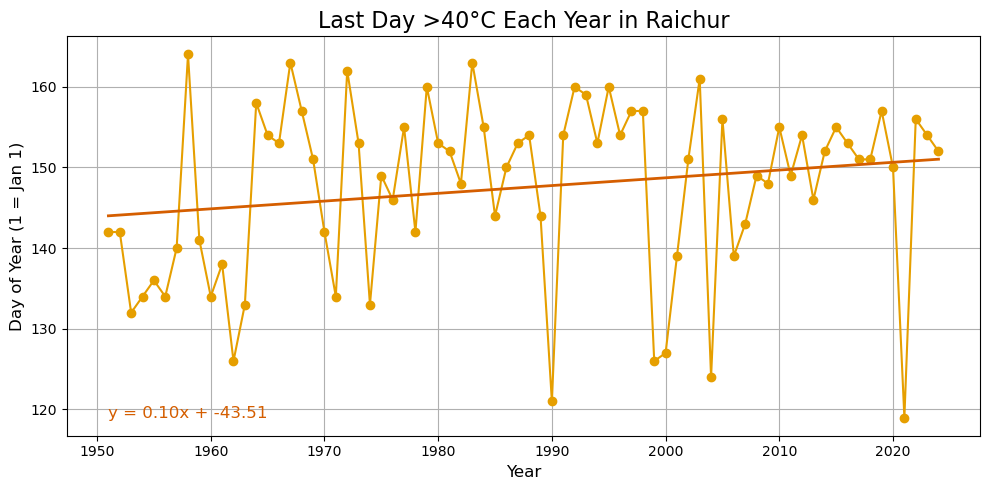

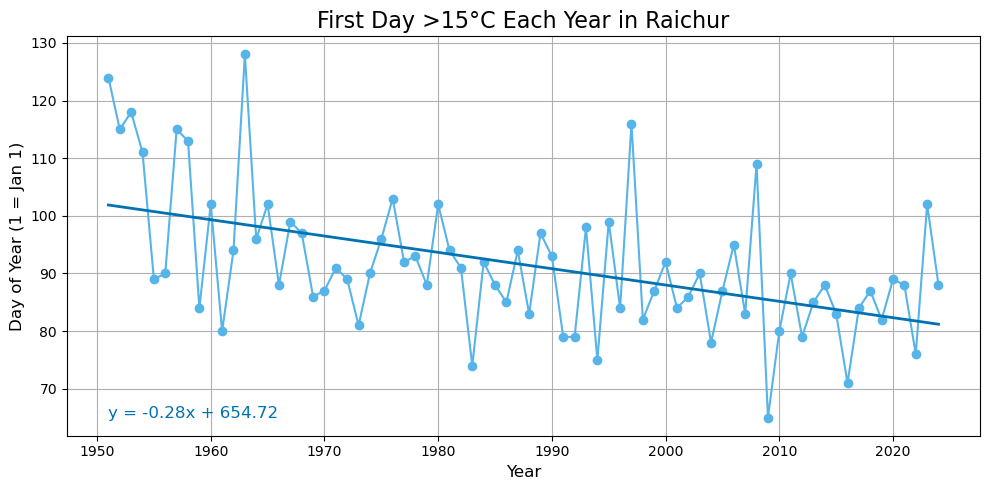

In [277]:
#####  29. Plotting the first and last hot day ##### 
# Settings
first_hot_df = first_hot_loc1 
last_hot_df = last_hot_loc1 
threshold = treshold_loc1_hot
location = "Raichur"
# End settings

plot_first_hot_day(first_hot_loc1 , threshold_loc1_hot, location="Raichur")
plot_last_hot_day(last_hot_loc1, threshold_loc1_hot, location="Raichur")
plot_first_cold_day(first_cold_loc1, threshold_loc1_cold, location="Raichur")

In [233]:
##### 30. Consevutive hot days. Flagging hot days in a df #####
# This will create a collumn with true/false values. True if the temperature is equal/above set treshold

hot_loc1 = t_max_loc1.iloc[:, 0] >= treshold_loc1_hot
hot_loc2 = t_max_loc2.iloc[:, 0] >= treshold_loc2_hot

cold_loc1 = t_min_loc1.iloc[:, 0] <= treshold_loc1_cold
cold_loc2 = t_min_loc2.iloc[:, 0] <= treshold_loc2_cold

In [235]:
##### 31. Consevutive hot days. Function definition #####
def analyze_hot_streaks(df, threshold, column_index=0):
    # Step 1: Identify hot days
    hot = df.iloc[:, column_index] > threshold

    # Step 2: Find streaks
    # Turning true/false to 1/0
    hot_int = hot.astype(int)
    
    streak_id = (hot_int != hot_int.shift()).cumsum()

    # Step 3: Combine into DataFrame
    hot_streaks = pd.DataFrame({
        'is_hot': hot,
        'streak_id': streak_id
    })

    # Step 4: Filter only hot streaks
    only_hot_streaks = hot_streaks[hot_streaks['is_hot']]

    # Step 5: Group and summarize
    streak_info = only_hot_streaks.groupby('streak_id').apply(
        lambda group: pd.Series({
            'size': len(group),
          #  'mean_length': group.index.mean(), #
            'start_date': group.index.min(),
            'end_date': group.index.max()
        })
    ).reset_index(drop=True)

    # Step 6: Add year for analysis
    streak_info['year'] = streak_info['start_date'].dt.year

    # Step 6.1: Taking only streaks of 2 days and longer
    streak_info = streak_info[streak_info['size'] >= 2]

    # Step 7: Aggregate
    longest_per_year = streak_info.groupby('year')['size'].max()
    streaks_per_year = streak_info.groupby('year').size()
    #mean_streak_length = streak_info.groupby('year').mean()

    # Step 8. Mean streak lenght
    mean_streak_length_per_year = streak_info.groupby('year')['size'].mean()

    return streak_info, longest_per_year, streaks_per_year, mean_streak_length_per_year


In [237]:
##### 32. Consevutive cold days. Function definition #####
def analyze_cold_streaks(df, threshold, column_index=0):
    # Step 1: Identify hot days
    cold = df.iloc[:, column_index] < threshold

    # Step 2: Find streaks
    # Turning true/false to 1/0
    cold_int = cold.astype(int)
    
    streak_id = (cold_int != cold_int.shift()).cumsum()

    # Step 3: Combine into DataFrame
    cold_streaks = pd.DataFrame({
        'is_cold': cold,
        'streak_id': streak_id
    })

    # Step 4: Filter only hot streaks
    only_cold_streaks = cold_streaks[cold_streaks['is_cold']]

    # Step 5: Group and summarize
    streak_info = only_cold_streaks.groupby('streak_id').apply(
        lambda group: pd.Series({
            'size': len(group),
          #  'mean_length': group.index.mean(), #
            'start_date': group.index.min(),
            'end_date': group.index.max()
        })
    ).reset_index(drop=True)

    # Step 6: Add year for analysis
    streak_info['year'] = streak_info['start_date'].dt.year

    # Step 6.1: Taking only streaks of 2 days and longer
    streak_info = streak_info[streak_info['size'] >= 2]

    # Step 7: Aggregate
    longest_per_year = streak_info.groupby('year')['size'].max()
    streaks_per_year = streak_info.groupby('year').size()

    # Step 8. Mean streak lenght
    mean_streak_length_per_year = streak_info.groupby('year')['size'].mean()

    return streak_info, longest_per_year, streaks_per_year, mean_streak_length_per_year

In [241]:
##### 33. Analysing the hot/cold streaks #####

print(f"{location_1}, hot streaks. {analyze_hot_streaks(t_max_loc1, treshold_loc1_hot, column_index=0)}")
print(f"{location_1}, cold streaks. {analyze_cold_streaks(t_min_loc1, treshold_loc1_cold, column_index=0)}")
print(f"{location_2}, hot streaks. {analyze_hot_streaks(t_max_loc2, treshold_loc2_hot, column_index=0)}")
print(f"{location_2}, cold streaks. {analyze_cold_streaks(t_min_loc2, treshold_loc2_cold, column_index=0)}")

C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2620766436.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streak_info = only_hot_streaks.groupby('streak_id').apply(
C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2466316388.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streak_info = only_cold_streaks.groupby('streak_id').apply(


Raichur, hot streaks. (     size start_date   end_date  year
1      14 1951-05-09 1951-05-22  1951
4      24 1952-04-28 1952-05-21  1952
5      15 1953-04-28 1953-05-12  1953
8       9 1954-04-28 1954-05-06  1954
9       3 1954-05-08 1954-05-10  1954
..    ...        ...        ...   ...
452     3 2023-05-27 2023-05-29  2023
454     2 2023-06-02 2023-06-03  2023
455    12 2024-03-28 2024-04-08  2024
456     5 2024-04-15 2024-04-19  2024
457    16 2024-04-22 2024-05-07  2024

[318 rows x 4 columns], year
1951    14
1952    24
1953    15
1954     9
1955     3
        ..
2020    10
2021     5
2022     7
2023     6
2024    16
Name: size, Length: 74, dtype: int64, year
1951    1
1952    1
1953    1
1954    2
1955    2
       ..
2020    5
2021    2
2022    5
2023    7
2024    3
Length: 74, dtype: int64, year
1951   14.00
1952   24.00
1953   15.00
1954    6.00
1955    2.50
        ... 
2020    7.00
2021    3.50
2022    4.80
2023    3.29
2024   11.00
Name: size, Length: 74, dtype: float64)
Rai

C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2620766436.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streak_info = only_hot_streaks.groupby('streak_id').apply(
C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2466316388.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streak_info = only_cold_streaks.groupby('streak_id').apply(


In [303]:
#####  34. Plotting hot streaks. Function definition ##### 
def plot_hot_streak_summary(df, threshold, column_index=0, location="Unknown"):
    # Step 1: Identify hot days
    hot = df.iloc[:, column_index] > threshold

    # Step 2: Streak grouping
    hot_int = hot.astype(int)
    streak_id = (hot_int != hot_int.shift()).cumsum()

    hot_streaks = pd.DataFrame({
        'is_hot': hot,
        'streak_id': streak_id
    })
    only_hot_streaks = hot_streaks[hot_streaks['is_hot']]

    # Step 3: Summarize each hot streak
    streak_info = only_hot_streaks.groupby('streak_id').apply(
        lambda group: pd.Series({
            'size': len(group),
            'start_date': group.index.min(),
            'end_date': group.index.max()
        })
    ).reset_index(drop=True)

    streak_info['year'] = streak_info['start_date'].dt.year
    streak_info = streak_info[streak_info['size'] >= 2]

    # Step 4: Aggregate per year
    longest_per_year = streak_info.groupby('year')['size'].max()
    streaks_per_year = streak_info.groupby('year').size()
    mean_streak_length = streak_info.groupby('year')['size'].mean()

    # Step 5: Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

    def add_trend(ax, x, y, color='black'):
        if len(x) >= 2:
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            trend_line = intercept + slope * np.array(x)
            ax.plot(x, trend_line, color="black", linestyle='--')
            eq_text = f"y = {slope:.2f}x + {intercept:.2f}, p={p_value:.3f}"
            ax.text(0.05, 0.95, eq_text, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5))

    # Longest streak
    years = longest_per_year.index
    values = longest_per_year.values
    axs[0].plot(years, values, marker='o', color='#D55E00')
    axs[0].set_title(f"Longest Streak >{threshold:.0f}°C in {location}", fontsize = 16)
    axs[0].set_ylabel("Days", fontsize=12)
    axs[0].set_xlabel("Year", fontsize=12)
    axs[0].grid(True)
    add_trend(axs[0], years, values)

    # Streak count
    years = streaks_per_year.index
    values = streaks_per_year.values
    axs[1].bar(years, values, color='#56B4E9')
    axs[1].set_title(f"Number of Hot Streaks >{threshold:.0f}°C in {location}",fontsize = 16)
    axs[1].set_ylabel("Number of Streaks", fontsize=12)
    axs[1].set_xlabel("Year", fontsize=12)
    axs[1].grid(True)
    add_trend(axs[1], years, values)

    # Mean streak length
    years = mean_streak_length.index
    values = mean_streak_length.values
    axs[2].plot(years, values, marker='s', color='#009E73')
    axs[2].set_title(f"Mean Streak Length >{threshold:.0f}°C in {location}", fontsize = 16)
    axs[2].set_ylabel("Average Days", fontsize=12)
    axs[2].set_xlabel("Year", fontsize=12)
    axs[2].grid(True)
    add_trend(axs[2], years, values)

    plt.tight_layout()
    plt.show()


In [317]:
#####  35. Plotting cold streaks. Function definition ##### 
def plot_cold_streak_summary(df, threshold, column_index=0, location="Unknown"):
    # Step 1: Identify cold days
    cold = df.iloc[:, column_index] < threshold

    # Step 2: Streak grouping
    cold_int = cold.astype(int)
    streak_id = (cold_int != cold_int.shift()).cumsum()

    cold_streaks = pd.DataFrame({
        'is_cold': cold,
        'streak_id': streak_id
    })
    only_cold_streaks = cold_streaks[cold_streaks['is_cold']]

    # Step 3: Summarize each cold streak
    streak_info = only_cold_streaks.groupby('streak_id').apply(
        lambda group: pd.Series({
            'size': len(group),
            'start_date': group.index.min(),
            'end_date': group.index.max()
        })
    ).reset_index(drop=True)

    streak_info['year'] = streak_info['start_date'].dt.year

    # Only keep streaks of 2 days or more
    streak_info = streak_info[streak_info['size'] >= 2]

    # Step 4: Aggregate per year
    longest_per_year = streak_info.groupby('year')['size'].max()
    streaks_per_year = streak_info.groupby('year').size()
    mean_streak_length = streak_info.groupby('year')['size'].mean()

    # Step 5: Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

    def add_trend(ax, x, y, color='black'):
        if len(x) >= 2:
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            trend_line = intercept + slope * np.array(x)
            ax.plot(x, trend_line, color='black', linestyle='--')
            eq_text = f"y = {slope:.2f}x + {intercept:.2f}, p={p_value:.3f}"
            ax.text(0.05, 0.95, eq_text, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5))
            

    # Longest streak
    years = longest_per_year.index
    values = longest_per_year.values
    axs[0].plot(years, values, marker='o', color='#D55E00')
    axs[0].set_title(f"Longest Streak <{threshold:.0f}°C in {location}", fontsize=16)
    axs[0].set_ylabel("Days", fontsize=12)
    axs[0].set_xlabel("Year", fontsize=12)
    axs[0].grid(True)
    add_trend(axs[0], years, values)

    # Streak count
    years = streaks_per_year.index
    values = streaks_per_year.values
    axs[1].bar(years, values, color='#56B4E9')
    axs[1].set_title(f"Number of Cold Streaks <{threshold:.0f}°C in {location}", fontsize=16)
    axs[1].set_ylabel("Number of Streaks", fontsize=12)
    axs[1].set_xlabel("Year", fontsize=12)
    axs[1].grid(True)
    add_trend(axs[1], years, values)

    # Mean streak length
    years = mean_streak_length.index
    values = mean_streak_length.values
    axs[2].plot(years, values, marker='s', color='#009E73')
    axs[2].set_title(f"Mean Streak Length <{threshold:.0f}°C in {location}", fontsize=16)
    axs[2].set_ylabel("Average Days", fontsize=12)
    axs[2].set_xlabel("Year", fontsize=12)
    axs[2].grid(True)
    add_trend(axs[2], years, values)

    plt.tight_layout()
    plt.show()

C:\Users\48512\AppData\Local\Temp\ipykernel_24916\2934714107.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streak_info = only_hot_streaks.groupby('streak_id').apply(


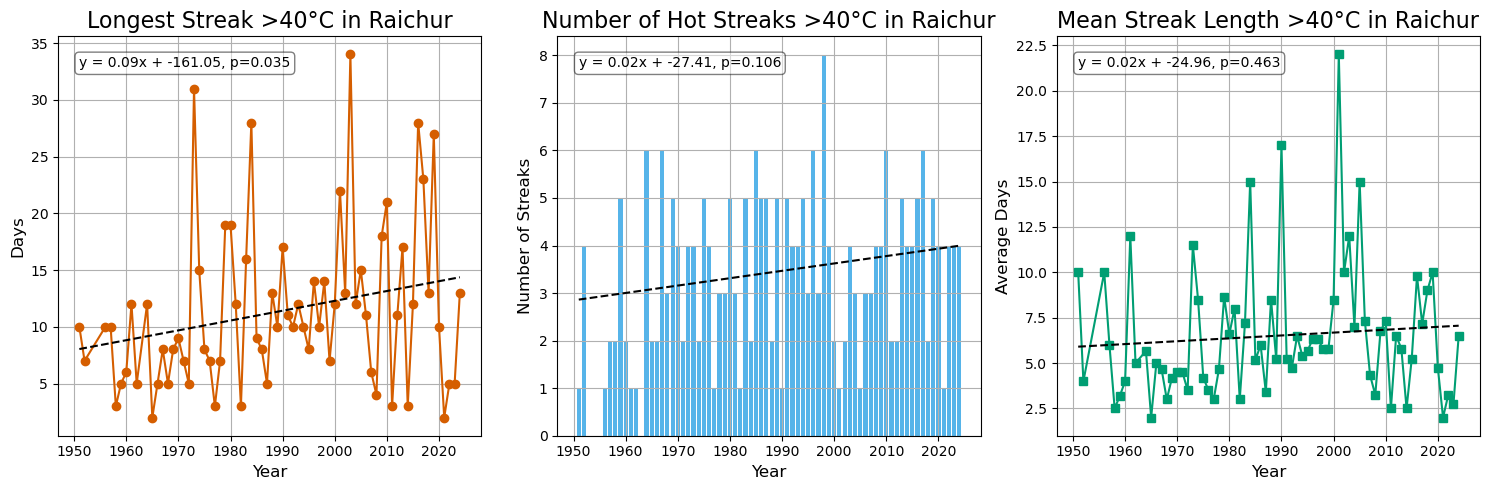

In [319]:
#####  36. Plotting hot streaks. ##### 
plot_hot_streak_summary(t_max_loc1, threshold_loc1_hot, location= "Raichur")

C:\Users\48512\AppData\Local\Temp\ipykernel_24916\3051025655.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streak_info = only_cold_streaks.groupby('streak_id').apply(


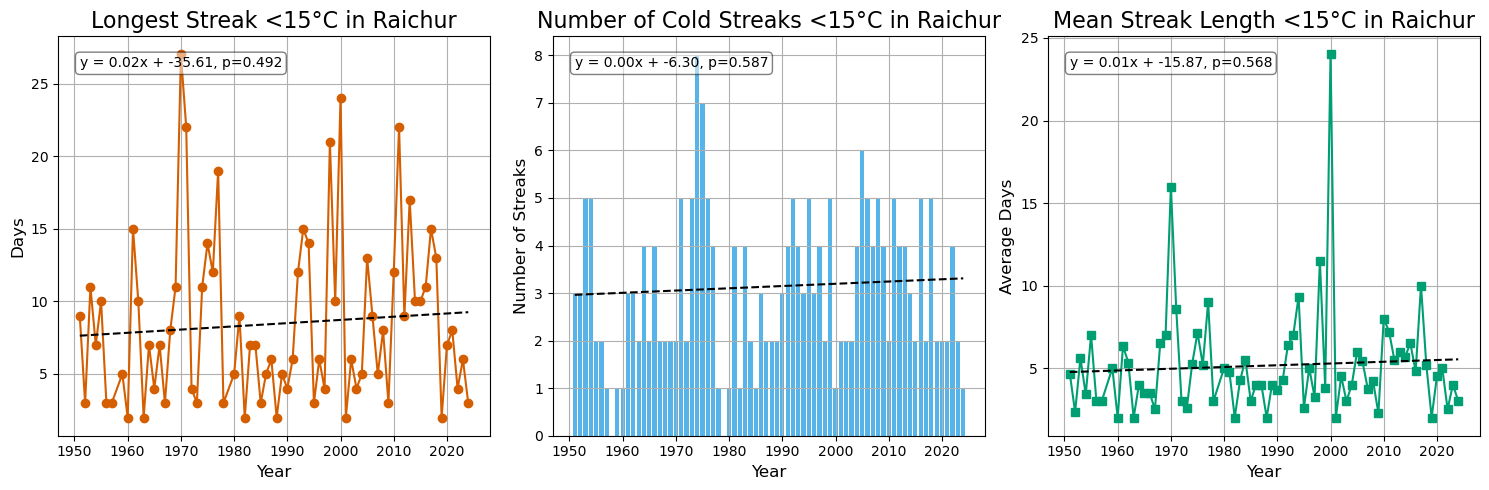

In [320]:
#####  37. Plotting cold streaks. ##### 
plot_cold_streak_summary(t_min_loc1, threshold_loc1_cold, location= "Raichur")